<a href="https://colab.research.google.com/github/Krishna-lab806/pbft_mechanism/blob/main/Hskkotaw%20/%20Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from phe import paillier
import random
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import json
import requests
import numpy as np

import hashlib

In [ ]:
!pip install phe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 975.3 kB/s eta 0:00:00


IMPLEMENTING THE PBFT PROTOCOL ALONG WITH ZERO KNOWLEDGE PROOF

In [ ]:
import pandas as pd
import random

# Load the dataset, using the 'error_bad_lines' argument to raise an exception when encountering bad lines
# This will show you all the lines that are causing read_csv to fail
df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv', sep=',', encoding='utf-8', on_bad_lines='error')

# Drop the specified row (example: row at index 32939)
df = df.drop(32939)

# Create a new column 'is_fake' with random 0s and 1s
df['is_fake'] = [random.choice([0, 1]) for _ in range(len(df))]

# Create a new column 'not_fake' which is the inverse of 'is_fake'
df['not_fake'] = [1 - x for x in df['is_fake']]

# Display the first few rows of the updated DataFrame
print(df.head())

   Unnamed: 0               userid         username  \
0           0            173212647   JoeMokolobetsi   
1           1            335041409  XclusivasPuebla   
2           2  1512400441103032323  ShelterAnimalUA   
3           3  1356632630662430722  DogandCatHelpe1   
4           4             20297125   ElMananaOnline   

                                            acctdesc        location  \
0  Yeshua Hamashiach is THE answer | Romans 10:9-...    Afrika Borwa   
1  Somos el periódico  #ExclusivasPuebla| Investi...  Puebla, México   
2  Shelter for abandoned dogs and cats. 1400 dogs...         Ukraine   
3  Shelter for abandoned dogs and cats. 1400 dogs...         Ukraine   
4  Las mejores noticias de los dos Laredos y el m...    Nuevo Laredo   

   following  followers  totaltweets               usercreatedts  \
0        219        197         4789  2010-07-31 19:09:22.000000   
1       1419       6402        70267  2011-07-14 02:02:24.000000   
2        782        109         

# New section

INCORPORATING HOMOMORPHIC ENCRYPTION

In [ ]:
!pip install tenseal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.5 MB/s eta 0:00:00



--- Consensus Round 1 ---
Node 3 generates proof: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a
Node 0 verifies proof: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a against expected: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a
Validation time: 0.59 seconds
Node 1 verifies proof: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a against expected: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a
Validation time: 1.27 seconds
Node 2 verifies proof: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a against expected: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a
Validation time: 1.69 seconds
Node 4 verifies proof: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a against expected: 588a00eb2ff5ace791ed3661c703f1a8b0dc95eee99767bdbf76e675053e769a
Validation time: 1.44 seconds
Block added to the blockchain.
Node 2 was slow in validation and loses 10 reputa

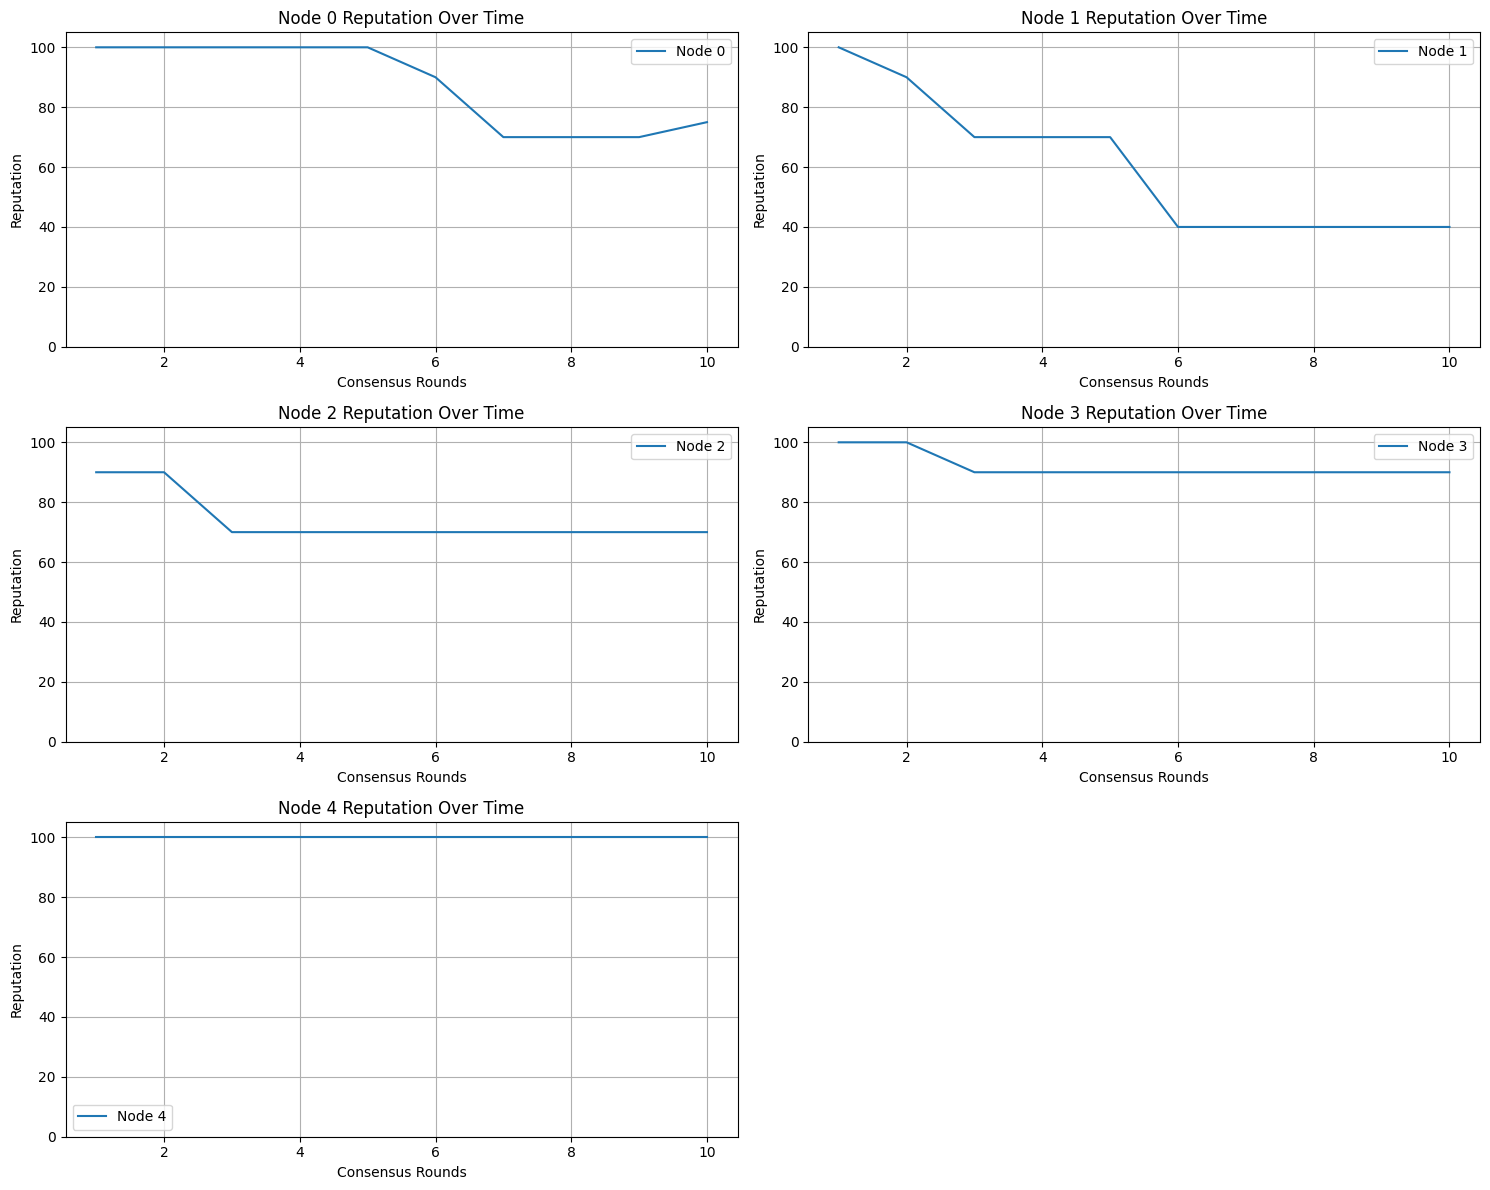


Node Performance Data:
   Round  Node 0  Node 1  Node 2  Node 3  Node 4
0      1     100     100      90     100     100
1      2     100      90      90     100     100
2      3     100      70      70      90     100
3      4     100      70      70      90     100
4      5     100      70      70      90     100
5      6      90      40      70      90     100
6      7      70      40      70      90     100
7      8      70      40      70      90     100
8      9      70      40      70      90     100
9     10      75      40      70      90     100


In [7]:
import random
import hashlib
import tenseal as ts
import time
import matplotlib.pyplot as plt
import pandas as pd

# Define a class to represent a Node in the blockchain network.
class Node:
    def __init__(self, node_id, context):
        self.node_id = node_id  # Unique identifier for the node.
        self.reputation = 100  # Initialize reputation at the maximum.
        self.is_malicious = False  # Track whether the node is malicious.
        self.context = context  # TenSEAL context for CKKS encryption.
        self.reputation_history = []  # Keep track of reputation changes over time.
        self.malicious_count = 0  # Track how many times the node was marked as malicious.
        self.validation_times = []  # Track time taken by the node for validation.

    # Propose a block of tweets for validation and add it to the blockchain.
    def propose_block(self, blockchain, tweets):
        # Encrypt the 'is_fake' values of the tweets using CKKS.
        is_fake_values = [tweet['is_fake'] for tweet in tweets]
        encrypted_tweets = ts.ckks_vector(self.context, is_fake_values)

        # Create a vector of ones to identify valid tweets (i.e., not fake).
        one_vector = ts.ckks_vector(self.context, [1] * len(tweets))
        valid_tweets = one_vector - encrypted_tweets  # Compute valid tweets.
        valid_tweet_count = valid_tweets.sum()  # Count the number of valid tweets.

        # Create a vector for the total number of tweets.
        total_tweets = ts.ckks_vector(self.context, [len(tweets)])

        # Generate a cryptographic proof based on the count of valid and total tweets.
        proof = self.generate_proof(valid_tweet_count, total_tweets)

        # Append the encrypted data and proof to the blockchain.
        blockchain.append((encrypted_tweets, valid_tweet_count, total_tweets, proof))

        return valid_tweet_count, total_tweets

    # Generate a cryptographic proof using SHA-256.
    def generate_proof(self, encrypted_count, encrypted_total):
        proof_data = str(encrypted_count) + str(encrypted_total)  # Concatenate encrypted data.
        proof = hashlib.sha256(proof_data.encode()).hexdigest()  # Hash the proof data.
        print(f"Node {self.node_id} generates proof: {proof}")
        return proof

    # Verify the proof of work for a proposed block by re-computing the expected proof.
    def verify_proof(self, proof, encrypted_count, encrypted_total):
        # Introduce a random delay to simulate validation time in a decentralized network.
        validation_time = random.uniform(0.1, 2.0)
        time.sleep(validation_time)
        self.validation_times.append(validation_time)

        # Recompute the expected proof and compare it with the given proof.
        proof_data = str(encrypted_count) + str(encrypted_total)
        expected_proof = hashlib.sha256(proof_data.encode()).hexdigest()
        print(f"Node {self.node_id} verifies proof: {proof} against expected: {expected_proof}")
        print(f"Validation time: {validation_time:.2f} seconds")
        return proof == expected_proof, validation_time

    # Update the node's reputation based on its performance and behavior.
    def update_reputation(self, score):
        self.reputation += score
        self.reputation = max(0, min(100, self.reputation))  # Ensure the reputation stays within the range of 0 to 100.
        self.reputation_history.append(self.reputation)

# Define a class to represent the entire blockchain network.
class BlockchainNetwork:
    def __init__(self, num_nodes):
        # Set up the TenSEAL context for CKKS encryption with appropriate parameters.
        self.context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
        self.context.global_scale = 2**40
        self.context.generate_galois_keys()  # Generate Galois keys for CKKS operations.

        # Initialize nodes in the network.
        self.nodes = [Node(i, self.context) for i in range(num_nodes)]
        self.blockchain = []  # Initialize the blockchain as an empty list.
        self.total_valid_tweets = ts.ckks_vector(self.context, [0])  # Initialize the count of valid tweets.
        self.total_tweets = ts.ckks_vector(self.context, [0])  # Initialize the total tweet count.
        self.validation_time_threshold = 1.5  # Set a threshold for validation times.

    # Achieve consensus on a block of tweets through node participation.
    def consensus(self, tweets):
        # Count total and valid tweets in the current round.
        current_total_tweets = len(tweets)
        current_valid_tweets = sum(tweet['is_fake'] == 0 for tweet in tweets)

        # Update the overall tweet statistics with CKKS-encrypted values.
        self.total_tweets += ts.ckks_vector(self.context, [current_total_tweets])
        self.total_valid_tweets += ts.ckks_vector(self.context, [current_valid_tweets])

        # Select nodes that have sufficient reputation (>= 50) for participation.
        eligible_nodes = [node for node in self.nodes if node.reputation >= 50]
        if len(eligible_nodes) < 1:
            print("Not enough eligible nodes for consensus.")
            return

        # Choose the primary node for proposing the block, with probability proportional to reputation.
        primary_node = random.choices(eligible_nodes, weights=[node.reputation for node in eligible_nodes], k=1)[0]

        # Primary node proposes a block.
        encrypted_count, encrypted_total = primary_node.propose_block(self.blockchain, tweets)

        # Verification phase: Other nodes validate the proof.
        malicious_detected = False
        slow_validators = []
        for node in eligible_nodes:
            if node != primary_node:
                is_valid, validation_time = node.verify_proof(self.blockchain[-1][3], encrypted_count, encrypted_total)
                if not is_valid:
                    primary_node.is_malicious = True
                    primary_node.malicious_count += 1
                    malicious_detected = True
                    print(f"Node {node.node_id} detected an invalid proof and reported Node {primary_node.node_id} as malicious.")
                    break
                if validation_time > self.validation_time_threshold:
                    slow_validators.append(node)

        # Handle malicious behavior and slow validators.
        if malicious_detected:
            reputation_loss = -20 * primary_node.malicious_count
            primary_node.update_reputation(reputation_loss)
            print(f"Node {primary_node.node_id} loses {-reputation_loss} reputation points.")
        else:
            print(f"Block added to the blockchain.")
            primary_node.update_reputation(5)

        for node in slow_validators:
            node.malicious_count += 1
            reputation_loss = -10 * node.malicious_count
            node.update_reputation(reputation_loss)
            print(f"Node {node.node_id} was slow in validation and loses {-reputation_loss} reputation points.")

        for node in self.nodes:
            if node not in slow_validators and node != primary_node:
                node.update_reputation(0)  # No reputation change for non-primary and timely validators.

    # Print a summary of node performance.
    def print_performance_summary(self):
        print("\nPerformance Summary of Nodes:")
        for node in self.nodes:
            status = "Malicious" if node.is_malicious else "Honest"
            avg_validation_time = sum(node.validation_times) / len(node.validation_times) if node.validation_times else 0
            print(f"Node {node.node_id}: Reputation = {node.reputation}, Status = {status}, "
                  f"Malicious Count = {node.malicious_count}, Avg Validation Time = {avg_validation_time:.2f}s")

    # Print statistics about the total and valid tweets processed by the network.
    def print_tweet_statistics(self):
        total_tweets = self.total_tweets.decrypt()[0]
        valid_tweets = self.total_valid_tweets.decrypt()[0]
        percentage_valid = (valid_tweets / total_tweets) * 100 if total_tweets > 0 else 0
        print(f"\nTweet Statistics:")
        print(f"Total Tweets Processed: {total_tweets:.0f}")
        print(f"Valid Tweets: {valid_tweets:.0f}")
        print(f"Percentage of Valid Tweets: {percentage_valid:.2f}%")

# Class to track node performance and plot reputations over time.
class NodePerformanceTracker:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.reputations = {i: [] for i in range(num_nodes)}  # Initialize reputation history for each node.
        self.rounds = 0  # Track the number of consensus rounds.

    # Update the reputation history after each round.
    def update(self, blockchain_network):
        self.rounds += 1
        for node in blockchain_network.nodes:
            self.reputations[node.node_id].append(node.reputation)

    # Plot the reputation trajectory of each node across consensus rounds.
    def plot_individual_performances(self):
        fig, axes = plt.subplots(nrows=(self.num_nodes + 1) // 2, ncols=2, figsize=(15, 5 * self.num_nodes // 2))
        axes = axes.flatten()

        # For each node, plot its reputation history over time.
        for node_id, reputation_history in self.reputations.items():
            ax = axes[node_id]
            ax.plot(range(1, self.rounds + 1), reputation_history, label=f'Node {node_id}')
            ax.set_title(f'Node {node_id} Reputation Over Time')
            ax.set_xlabel('Consensus Rounds')
            ax.set_ylabel('Reputation')
            ax.legend()
            ax.grid(True)
            ax.set_ylim(0, 105)

        for i in range(self.num_nodes, len(axes)):
            fig.delaxes(axes[i])  # Remove unused subplots if there are fewer nodes than axes.

        plt.tight_layout()
        plt.show()

    # Convert the reputation data into a DataFrame for analysis.
    def get_performance_data(self):
        data = {'Round': list(range(1, self.rounds + 1))}
        for node_id, reputation_history in self.reputations.items():
            data[f'Node {node_id}'] = reputation_history
        return pd.DataFrame(data)

# Main execution
if __name__ == "__main__":
    # Load and prepare tweets by randomly sampling 30 tweets and assigning random 'is_fake' labels.
    df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv')
    selected_tweets = df.sample(30)
    tweets = [
        {'text': row['text'], 'is_fake': random.choice([0, 1])}
        for _, row in selected_tweets.iterrows()
    ]

    # Initialize the blockchain network with 5 nodes and set up the performance tracker.
    blockchain_network = BlockchainNetwork(5)
    performance_tracker = NodePerformanceTracker(5)

    # Run the consensus protocol for 10 rounds, simulating the blockchain operation.
    for round_number in range(10):
        print(f"\n--- Consensus Round {round_number + 1} ---")
        blockchain_network.consensus(tweets)
        blockchain_network.print_performance_summary()
        performance_tracker.update(blockchain_network)

    # Print tweet statistics after all consensus rounds are complete.
    blockchain_network.print_tweet_statistics()

    # Plot the reputation performance of individual nodes over time.
    performance_tracker.plot_individual_performances()

    # Retrieve and display the performance data as a DataFrame.
    performance_data = performance_tracker.get_performance_data()
    print("\nNode Performance Data:")
    print(performance_data)

In [8]:
!pip install tenseal

WITH HYPERLEDGER LATENCY AND THROUGHPUT


--- Consensus Round 1 ---
Node 3 generates proof: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40
Node 0 verifies proof: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40 against expected: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40
Validation time: 1.38 seconds
Node 1 verifies proof: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40 against expected: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40
Validation time: 1.62 seconds
Node 2 verifies proof: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40 against expected: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40
Validation time: 0.32 seconds
Node 4 verifies proof: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40 against expected: 5a7f58bec34b6ae9af806e55a8485b8451dcae77a4d43f0347be5a0767f08c40
Validation time: 1.94 seconds
Block added to the blockchain.
Node 1 was slow in validation and loses 10 reputa

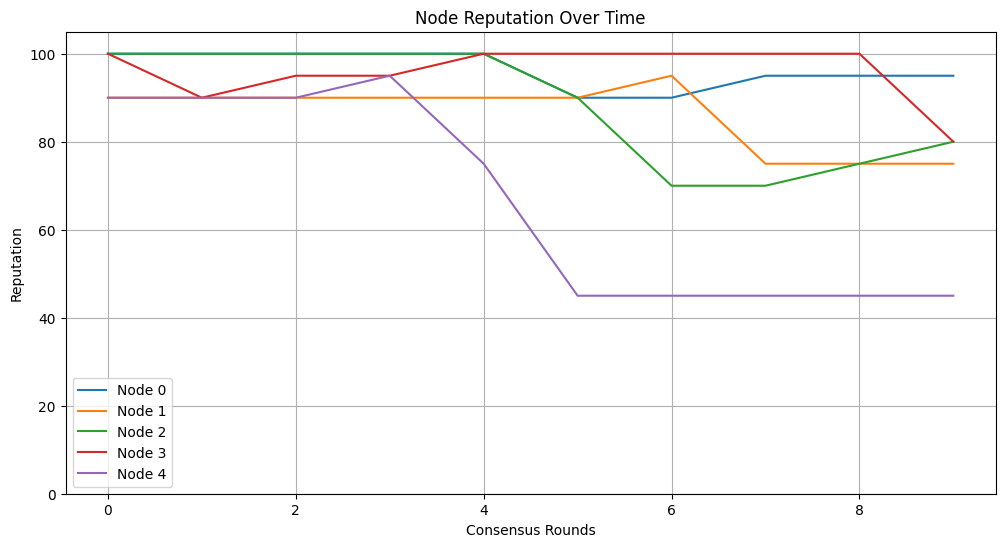

Total time taken for 500 blocks with 0.5 seconds average latency: 312.34 secs
Total time taken for 500 blocks with 2 seconds average latency: 1247.05 secs
Total time taken for 500 blocks with 5 seconds average latency: 3096.66 secs
Total time taken for 1000 blocks with 0.5 seconds average latency: 624.80 secs
Total time taken for 1000 blocks with 2 seconds average latency: 2520.33 secs
Total time taken for 1000 blocks with 5 seconds average latency: 6261.94 secs
Total time taken for 2000 blocks with 0.5 seconds average latency: 1250.50 secs
Total time taken for 2000 blocks with 2 seconds average latency: 5005.39 secs
Total time taken for 2000 blocks with 5 seconds average latency: 12462.07 secs


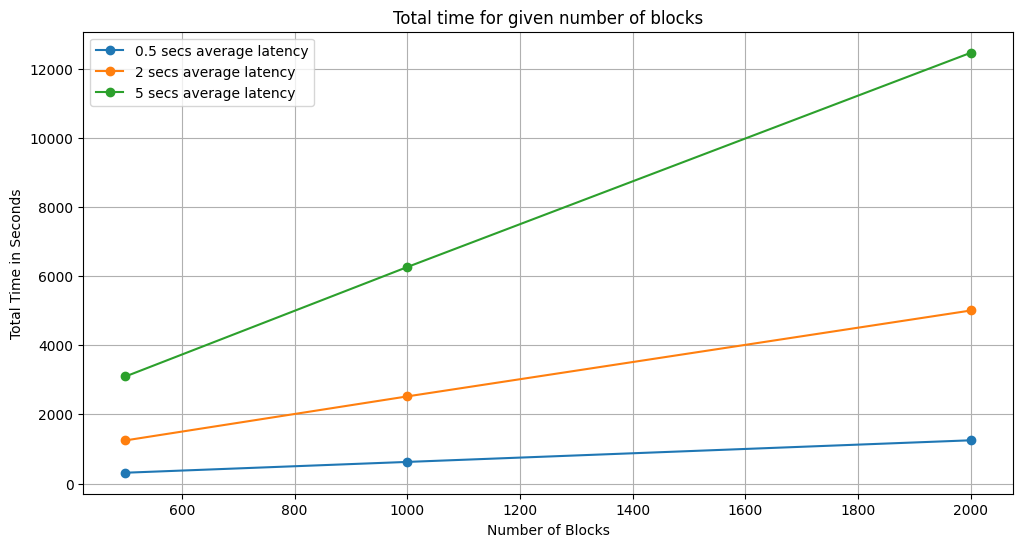

In [10]:
import random
import hashlib
import tenseal as ts
import time
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd

# Class definition for a Node in the blockchain network.
class Node:
    def __init__(self, node_id, context):
        self.node_id = node_id  # Unique identifier for the node
        self.reputation = 100  # Initialize the node's reputation at 100
        self.is_malicious = False  # Flag to mark whether the node is malicious
        self.context = context  # TenSEAL context for encryption
        self.reputation_history = []  # Stores the history of reputation changes
        self.malicious_count = 0  # Tracks how many times the node has been marked malicious
        self.validation_times = []  # Records validation times of blocks
        self.block_creation_times = []  # Records times for block creation

    # Function to propose a block of tweets for validation and addition to the blockchain
    def propose_block(self, blockchain, tweets):
        start_time = time.time()  # Start timer for block creation
        is_fake_values = [tweet['is_fake'] for tweet in tweets]  # Collect 'is_fake' values for tweets
        encrypted_tweets = ts.ckks_vector(self.context, is_fake_values)  # Encrypt tweet data using CKKS

        # Create a vector of ones to calculate the number of valid tweets
        one_vector = ts.ckks_vector(self.context, [1] * len(tweets))
        valid_tweets = one_vector - encrypted_tweets  # Valid tweets are those not fake
        valid_tweet_count = valid_tweets.sum()  # Sum of valid tweets

        total_tweets = ts.ckks_vector(self.context, [len(tweets)])  # Total number of tweets in the block

        # Generate a cryptographic proof for the block
        proof = self.generate_proof(valid_tweet_count, total_tweets)

        # Add block to the blockchain
        blockchain.append((encrypted_tweets, valid_tweet_count, total_tweets, proof))

        end_time = time.time()  # End timer for block creation
        block_creation_time = end_time - start_time  # Calculate block creation time
        self.block_creation_times.append(block_creation_time)  # Record block creation time

        return valid_tweet_count, total_tweets, block_creation_time

    # Function to generate a cryptographic proof of validity for a block
    def generate_proof(self, encrypted_count, encrypted_total):
        proof_data = str(encrypted_count) + str(encrypted_total)  # Combine counts for proof
        proof = hashlib.sha256(proof_data.encode()).hexdigest()  # Hash the proof data using SHA-256
        print(f"Node {self.node_id} generates proof: {proof}")
        return proof

    # Function to verify the cryptographic proof of another node's block
    def verify_proof(self, proof, encrypted_count, encrypted_total):
        validation_time = random.uniform(0.1, 2.0)  # Random time to simulate validation delay
        time.sleep(validation_time)  # Simulate the time taken for verification

        self.validation_times.append(validation_time)  # Record validation time

        proof_data = str(encrypted_count) + str(encrypted_total)  # Recreate the proof data
        expected_proof = hashlib.sha256(proof_data.encode()).hexdigest()  # Compute the expected proof
        print(f"Node {self.node_id} verifies proof: {proof} against expected: {expected_proof}")
        print(f"Validation time: {validation_time:.2f} seconds")
        return proof == expected_proof, validation_time  # Return the result of the verification

    # Function to update the node's reputation based on its behavior
    def update_reputation(self, score):
        self.reputation += score  # Adjust reputation by the given score
        self.reputation = max(0, min(100, self.reputation))  # Ensure reputation stays between 0 and 100
        self.reputation_history.append(self.reputation)  # Track reputation over time

# Class definition for the BlockchainNetwork, responsible for maintaining consensus
class BlockchainNetwork:
    def __init__(self, num_nodes):
        # Set up CKKS encryption context with specific parameters
        self.context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
        self.context.global_scale = 2**40
        self.context.generate_galois_keys()  # Generate Galois keys for CKKS operations

        # Initialize nodes and the blockchain
        self.nodes = [Node(i, self.context) for i in range(num_nodes)]
        self.blockchain = []
        self.total_valid_tweets = ts.ckks_vector(self.context, [0])  # Initialize encrypted count of valid tweets
        self.total_tweets = ts.ckks_vector(self.context, [0])  # Initialize encrypted count of total tweets

        # Thresholds for performance criteria
        self.validation_time_threshold = 1.5  # Maximum validation time before penalizing a node
        self.block_creation_time_threshold = 1.0  # Maximum block creation time before penalizing a node

        # Deques to track latencies and throughputs over time
        self.latencies = deque(maxlen=1000)
        self.throughputs = deque(maxlen=1000)

    # Consensus mechanism for validating tweets and proposing new blocks
    def consensus(self, tweets):
        start_time = time.time()  # Start timer for consensus round

        # Encrypt tweet statistics for use in consensus
        current_total_tweets = len(tweets)  # Number of tweets in this round
        current_valid_tweets = sum(tweet['is_fake'] == 0 for tweet in tweets)  # Count valid tweets

        self.total_tweets += ts.ckks_vector(self.context, [current_total_tweets])  # Update total tweet count
        self.total_valid_tweets += ts.ckks_vector(self.context, [current_valid_tweets])  # Update valid tweet count

        # Select nodes eligible for consensus based on their reputation
        eligible_nodes = [node for node in self.nodes if node.reputation >= 50]
        if len(eligible_nodes) < 1:
            print("Not enough eligible nodes for consensus.")
            return

        # Choose the primary node for proposing a block
        primary_node = random.choices(eligible_nodes, weights=[node.reputation for node in eligible_nodes], k=1)[0]

        # Primary node proposes the block
        encrypted_count, encrypted_total, block_creation_time = primary_node.propose_block(self.blockchain, tweets)

        # Verification phase: other nodes validate the primary node's block
        malicious_detected = False
        slow_validators = []
        for node in eligible_nodes:
            if node != primary_node:
                is_valid, validation_time = node.verify_proof(self.blockchain[-1][3], encrypted_count, encrypted_total)
                if not is_valid:
                    # Malicious behavior detected
                    primary_node.is_malicious = True
                    primary_node.malicious_count += 1
                    malicious_detected = True
                    print(f"Node {node.node_id} detected an invalid proof and reported Node {primary_node.node_id} as malicious.")
                    break
                if validation_time > self.validation_time_threshold:
                    slow_validators.append(node)

        # Update reputation based on behavior
        if malicious_detected:
            reputation_loss = -20 * primary_node.malicious_count  # Penalize malicious node
            primary_node.update_reputation(reputation_loss)
            print(f"Node {primary_node.node_id} loses {-reputation_loss} reputation points.")
        else:
            print(f"Block added to the blockchain.")
            primary_node.update_reputation(5)  # Reward the primary node for honest behavior

        # Penalize slow validators
        for node in slow_validators:
            node.malicious_count += 1
            reputation_loss = -10 * node.malicious_count
            node.update_reputation(reputation_loss)
            print(f"Node {node.node_id} was slow in validation and loses {-reputation_loss} reputation points.")

        # Penalize primary node for slow block creation
        if block_creation_time > self.block_creation_time_threshold:
            primary_node.update_reputation(-10)
            print(f"Node {primary_node.node_id} was slow in block creation and loses 10 reputation points.")

        # Adjust reputations of other nodes
        for node in self.nodes:
            if node not in slow_validators and node != primary_node:
                node.update_reputation(0)

        # Calculate and store latency and throughput for this round
        end_time = time.time()
        total_latency = end_time - start_time
        self.latencies.append(total_latency)

        throughput = len(tweets) / total_latency
        self.throughputs.append(throughput)

    # Print summary of performance for each node
    def print_performance_summary(self):
        print("\nPerformance Summary of Nodes:")
        for node in self.nodes:
            status = "Malicious" if node.is_malicious else "Honest"
            avg_validation_time = sum(node.validation_times) / len(node.validation_times) if node.validation_times else 0
            avg_block_creation_time = sum(node.block_creation_times) / len(node.block_creation_times) if node.block_creation_times else 0
            print(f"Node {node.node_id}: Reputation = {node.reputation}, Status = {status}, "
                  f"Malicious Count = {node.malicious_count}, Avg Validation Time = {avg_validation_time:.2f}s, "
                  f"Avg Block Creation Time = {avg_block_creation_time:.2f}s")

    # Print tweet statistics after multiple rounds
    def print_tweet_statistics(self):
        total_tweets = self.total_tweets.decrypt()[0]
        valid_tweets = self.total_valid_tweets.decrypt()[0]
        percentage_valid = (valid_tweets / total_tweets) * 100 if total_tweets > 0 else 0
        print(f"\nTweet Statistics:")
        print(f"Total Tweets Processed: {total_tweets:.0f}")
        print(f"Valid Tweets: {valid_tweets:.0f}")
        print(f"Percentage of Valid Tweets: {percentage_valid:.2f}%")

    # Print latency and throughput statistics for the network
    def print_latency_throughput_stats(self):
        avg_latency = sum(self.latencies) / len(self.latencies) if self.latencies else 0
        avg_throughput = sum(self.throughputs) / len(self.throughputs) if self.throughputs else 0
        print(f"\nLatency and Throughput Statistics:")
        print(f"Average Latency: {avg_latency:.2f} seconds")
        print(f"Average Throughput: {avg_throughput:.2f} tweets per second")

    # Plot the reputation performance of nodes over time
    def plot_node_performance(self):
        plt.figure(figsize=(12, 6))
        for node in self.nodes:
            plt.plot(range(len(node.reputation_history)), node.reputation_history, label=f'Node {node.node_id}')

        plt.title('Node Reputation Over Time')
        plt.xlabel('Consensus Rounds')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 105)
        plt.show()

    # Simulate the total latency for a set number of blocks
    def simulate_latency(self, n, average_latency):
        total_time = 0
        for i in range(n):
            block_latency = random.uniform(0.8 * average_latency, 1.2 * average_latency)
            block_latency *= (1 + (i / n) * 0.5)  # Increase latency over time for simulation
            total_time += block_latency
        return total_time

    # Run latency simulation over multiple scenarios and parameters
    def run_latency_simulation(self, n_list, average_latency_list):
        results = {}
        for n in n_list:
            for average_latency in average_latency_list:
                try:
                    total_time = self.simulate_latency(n, average_latency)
                    print(f"Total time taken for {n} blocks with {average_latency} seconds average latency: {total_time:.2f} secs")
                    results[(n, average_latency)] = total_time
                except RuntimeError as re:
                    print("Runtime Error:", re)
        return results

    # Plot latency simulation results
    def plot_latency_results(self, results, n_list, average_latency_list):
        plt.figure(figsize=(12, 6))
        for latency in average_latency_list:
            latencies = [results[(n, latency)] for n in n_list]
            plt.plot(n_list, latencies, marker='o', label=f'{latency} secs average latency')

        plt.xlabel("Number of Blocks")
        plt.ylabel("Total Time in Seconds")
        plt.title("Total time for given number of blocks")
        plt.legend()
        plt.grid(True)
        plt.show()

# Load the dataset
df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv')

# Drop rows with missing values in the 'text' column
df = df.dropna(subset=['text'])

# Select 30 random tweets from the dataset
selected_tweets = df.sample(30)
tweets = [{'text': row['text'], 'is_fake': random.choice([0, 1])} for index, row in selected_tweets.iterrows()]

# Example usage
blockchain_network = BlockchainNetwork(5)

# Run the original consensus simulation for 10 rounds
for round_number in range(10):
    print(f"\n--- Consensus Round {round_number + 1} ---")
    blockchain_network.consensus(tweets)
    blockchain_network.print_performance_summary()

blockchain_network.print_tweet_statistics()
blockchain_network.print_latency_throughput_stats()
blockchain_network.plot_node_performance()

# Run latency simulation with realistic values
n_list = [500, 1000, 2000]
average_latency_list = [0.5, 2, 5]

results = blockchain_network.run_latency_simulation(n_list, average_latency_list)

# Plot latency results
blockchain_network.plot_latency_results(results, n_list, average_latency_list)

In [11]:
!pip install tenseal

WHEN PRIMARY NODE IS CHANGED EACH CONSESNUS ROUND :


--- Consensus Round 1 ---

Primary Node for this round: Node 3
Primary Node Reputation: 100
Primary Node Malicious Count: 0
Node 3 generates proof: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7
Node 0 verifies proof: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7 against expected: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7
Validation time: 0.000027 seconds
Node 1 verifies proof: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7 against expected: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7
Validation time: 0.000018 seconds
Node 2 verifies proof: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7 against expected: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7
Validation time: 0.000007 seconds
Node 4 verifies proof: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7 against expected: c627f7737fdecef2f4783b16078833fd17c7198c919112545e8b81b8ad6a31f7


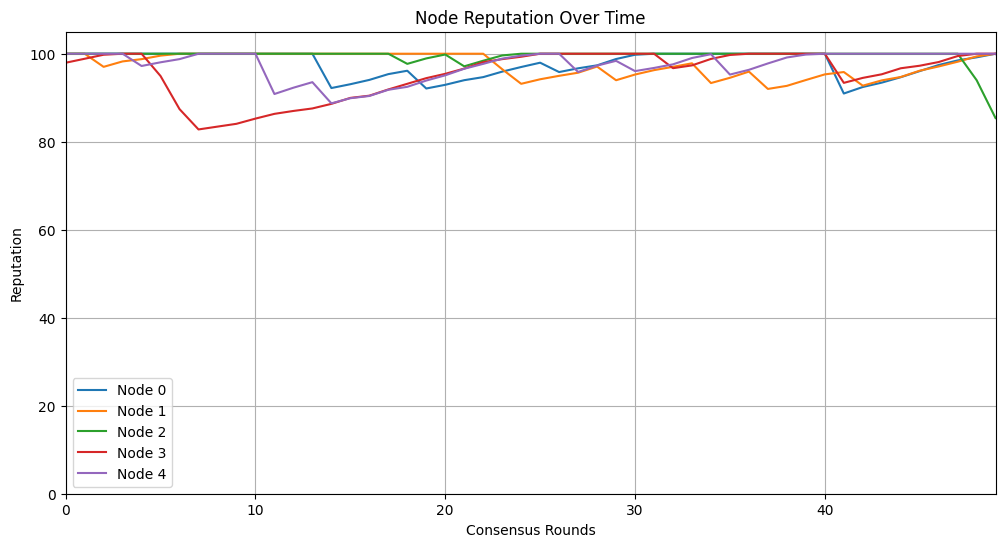


Leader Performance Summary:
Node 3:
 Times as leader: 8
 Average Latency: 0.029087 seconds
 Average Throughput: 557.79 tweets per second
 Average Reputation: 93.00
 Total Malicious Detections: 0
Node 1:
 Times as leader: 14
 Average Latency: 0.028562 seconds
 Average Throughput: 569.76 tweets per second
 Average Reputation: 92.15
 Total Malicious Detections: 0
Node 4:
 Times as leader: 13
 Average Latency: 0.028004 seconds
 Average Throughput: 580.58 tweets per second
 Average Reputation: 91.61
 Total Malicious Detections: 0
Node 0:
 Times as leader: 7
 Average Latency: 0.030056 seconds
 Average Throughput: 537.25 tweets per second
 Average Reputation: 93.46
 Total Malicious Detections: 0
Node 2:
 Times as leader: 8
 Average Latency: 0.027038 seconds
 Average Throughput: 601.13 tweets per second
 Average Reputation: 92.34
 Total Malicious Detections: 0


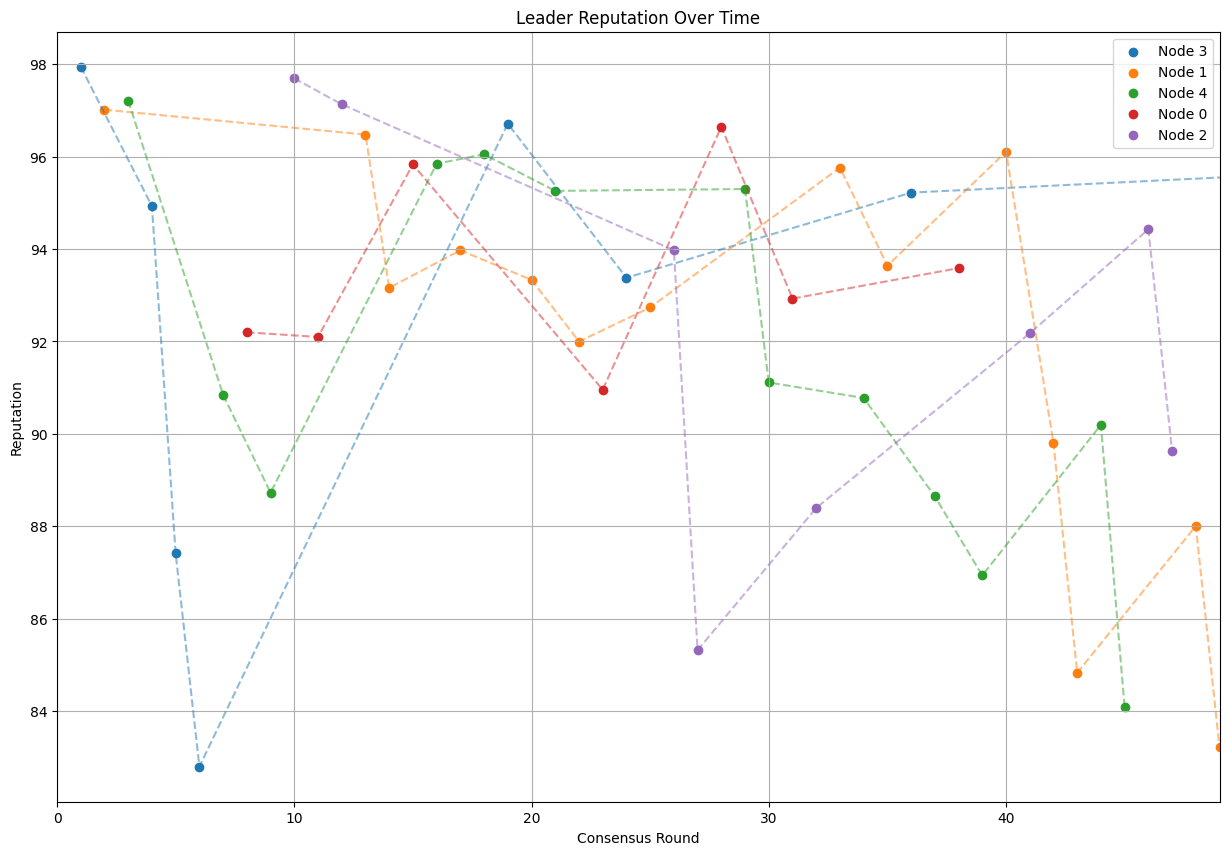

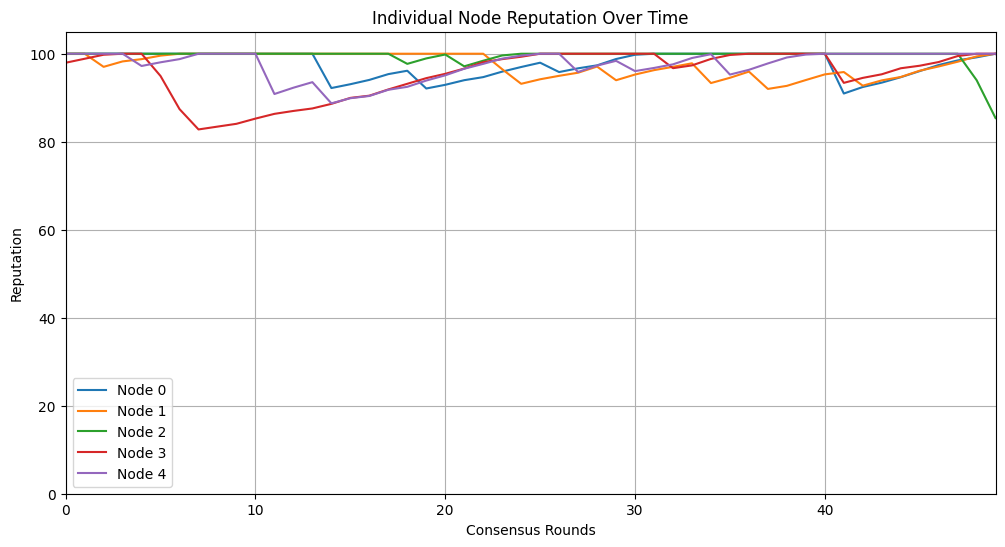

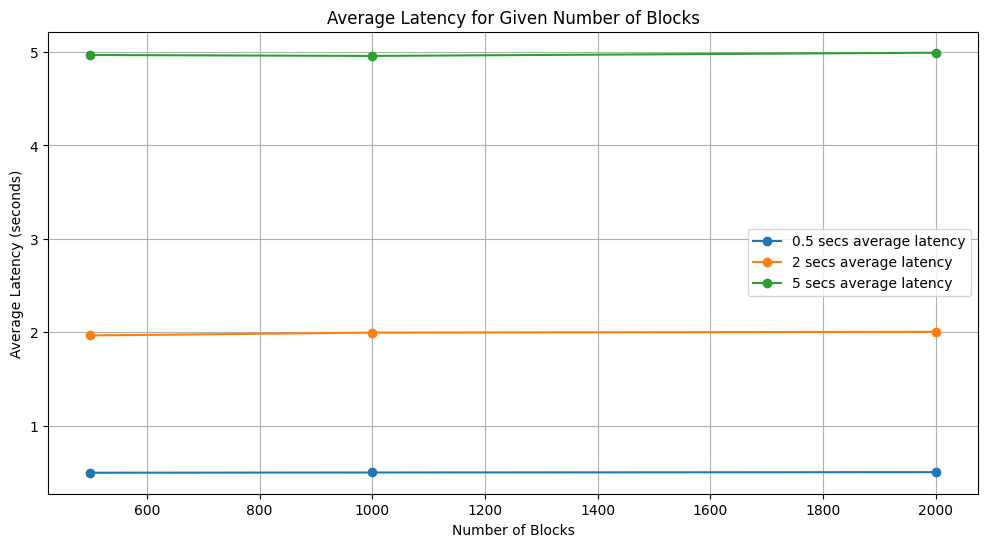

In [17]:
import random
import hashlib
import tenseal as ts
import time
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd

# Class to represent individual nodes in the blockchain network
class Node:
    def __init__(self, node_id, context):
        self.node_id = node_id  # Unique ID of the node
        self.reputation = 100  # Initial reputation score for the node
        self.is_malicious = False  # Flag to indicate if the node is malicious
        self.context = context  # Encryption context using TenSEAL
        self.reputation_history = []  # To store the reputation score over time
        self.malicious_count = 0  # Count of times the node is detected as malicious
        self.validation_times = []  # To store the time taken for validation
        self.block_creation_times = []  # To store the time taken for block creation

    # Method for a node to propose a new block of tweets
    def propose_block(self, blockchain, tweets):
        start_time = time.time()  # Start block creation timer

        # Filter non-fake tweets and convert tweet text to ordinal values
        non_fake_tweets = [tweet for tweet in tweets if tweet['is_fake'] == 0]
        tweet_values = [ord(c) for tweet in non_fake_tweets for c in tweet['text']]

        # Encrypt tweet text using CKKS encryption
        encrypted_tweets = ts.ckks_vector(self.context, tweet_values)

        # Compute the count of valid (non-fake) tweets and total tweets
        valid_tweet_count = ts.ckks_vector(self.context, [len(non_fake_tweets)])
        total_tweets = ts.ckks_vector(self.context, [len(tweets)])

        # Generate cryptographic proof for the block
        proof = self.generate_proof(valid_tweet_count, total_tweets)

        # Append the block (encrypted tweets, counts, and proof) to the blockchain
        blockchain.append((encrypted_tweets, valid_tweet_count, total_tweets, proof))

        # Measure and record block creation time
        end_time = time.time()
        block_creation_time = end_time - start_time
        self.block_creation_times.append(block_creation_time)

        return valid_tweet_count, total_tweets, block_creation_time

    # Method to generate a cryptographic proof using SHA-256
    def generate_proof(self, valid_tweet_count, total_tweets):
        proof_data = str(valid_tweet_count) + str(total_tweets)  # Concatenate valid and total tweet counts
        proof = hashlib.sha256(proof_data.encode()).hexdigest()  # Generate SHA-256 hash
        print(f"Node {self.node_id} generates proof: {proof}")
        return proof

    # Method to verify the cryptographic proof of a block
    def verify_proof(self, proof, valid_tweet_count, total_tweets):
        start_time = time.time()  # Start timer for validation

        # Recreate the proof data and expected proof
        proof_data = str(valid_tweet_count) + str(total_tweets)
        expected_proof = hashlib.sha256(proof_data.encode()).hexdigest()

        # Check if the proof matches the expected proof
        is_valid = proof == expected_proof

        # Record the time taken for validation
        end_time = time.time()
        validation_time = end_time - start_time
        self.validation_times.append(validation_time)

        print(f"Node {self.node_id} verifies proof: {proof} against expected: {expected_proof}")
        print(f"Validation time: {validation_time:.6f} seconds")

        # Update reputation based on the validation time
        self.update_reputation(validation_time, 0.1)
        return is_valid, validation_time

    # Method to update the reputation score of the node
    def update_reputation(self, validation_time, threshold):
        # Increase or decrease reputation based on how fast the node validated the block
        if validation_time <= threshold:
            self.reputation += random.uniform(0.5, 1.5)
        else:
            reputation_loss = random.uniform(0.5, 1.5) * (validation_time - threshold)
            self.reputation -= reputation_loss

        # Ensure reputation stays within the range of 0 to 100
        self.reputation = max(0, min(100, self.reputation))
        self.reputation_history.append(self.reputation)

# Blockchain network class that coordinates node interaction and consensus
class BlockchainNetwork:
    def __init__(self, num_nodes):
        # Create encryption context with CKKS scheme using TenSEAL
        self.context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
        self.context.global_scale = 2**40  # Global scale for encryption precision
        self.context.generate_galois_keys()  # Generate Galois keys for rotation and other operations

        # Initialize nodes and blockchain
        self.nodes = [Node(i, self.context) for i in range(num_nodes)]
        self.blockchain = []  # Store blocks added to the blockchain
        self.total_valid_tweets = ts.ckks_vector(self.context, [0])  # Track total valid tweets in encrypted form
        self.total_tweets = ts.ckks_vector(self.context, [0])  # Track total tweets in encrypted form

        # Thresholds for validation and block creation times
        self.validation_time_threshold = 0.1
        self.block_creation_time_threshold = 1.0

        # Data structures to track latencies and throughputs
        self.latencies = deque(maxlen=1000)
        self.throughputs = deque(maxlen=1000)

        # Dictionary to track leader node performance over time
        self.leader_performance = {}

    # Method to achieve consensus among nodes for a new block of tweets
    def consensus(self, tweets):
        eligible_nodes = [node for node in self.nodes if node.reputation >= 50]  # Select nodes with reputation >= 50

        if len(eligible_nodes) < 1:
            print("Not enough eligible nodes for consensus.")
            return

        # Select primary node based on weighted reputation
        primary_node = random.choices(eligible_nodes, weights=[node.reputation for node in eligible_nodes], k=1)[0]

        print(f"\nPrimary Node for this round: Node {primary_node.node_id}")
        print(f"Primary Node Reputation: {primary_node.reputation}")
        print(f"Primary Node Malicious Count: {primary_node.malicious_count}")

        # Primary node proposes a new block
        start_time = time.time()
        valid_tweet_count, total_tweets, block_creation_time = primary_node.propose_block(self.blockchain, tweets)

        # Nodes verify the proof generated by the primary node
        malicious_detected = False
        for node in eligible_nodes:
            if node != primary_node:
                is_valid, validation_time = node.verify_proof(self.blockchain[-1][3], valid_tweet_count, total_tweets)
                if not is_valid:
                    # Report primary node as malicious if proof is invalid
                    primary_node.is_malicious = True
                    primary_node.malicious_count += 1
                    malicious_detected = True
                    print(f"Node {node.node_id} detected an invalid proof and reported Node {primary_node.node_id} as malicious.")
                    break
                node.update_reputation(validation_time, self.validation_time_threshold)  # Update reputation based on validation

        if malicious_detected:
            # Penalize the primary node for malicious behavior
            reputation_loss = random.uniform(15, 25) * primary_node.malicious_count
            primary_node.update_reputation(-reputation_loss, self.validation_time_threshold)
            print(f"Node {primary_node.node_id} loses {reputation_loss:.2f} reputation points.")
        else:
            # Add the block to the blockchain and update tweet statistics
            self.total_valid_tweets += valid_tweet_count
            self.total_tweets += total_tweets
            print(f"Block added to the blockchain.")

            # Reward the primary node for successful block creation
            primary_node.update_reputation(random.uniform(3, 7), self.validation_time_threshold)

            # Penalize the primary node if block creation time exceeds threshold
            if block_creation_time > self.block_creation_time_threshold:
                primary_node.update_reputation(-random.uniform(8, 12), self.validation_time_threshold)
                print(f"Node {primary_node.node_id} was slow in block creation and loses reputation points.")

        # Slightly adjust reputation for nodes not participating in the consensus round
        for node in self.nodes:
            if node not in eligible_nodes:
                node.update_reputation(random.uniform(-0.5, 0.5), self.validation_time_threshold)

        # Record latency and throughput for this round
        end_time = time.time()
        total_latency = end_time - start_time
        self.latencies.append(total_latency)

        throughput = len(tweets) / total_latency
        self.throughputs.append(throughput)

        # Track the leader's performance for analysis
        if primary_node.node_id not in self.leader_performance:
            self.leader_performance[primary_node.node_id] = []
        self.leader_performance[primary_node.node_id].append({
            'round': len(self.blockchain),
            'latency': total_latency,
            'throughput': throughput,
            'reputation': primary_node.reputation,
            'malicious_count': primary_node.malicious_count
        })

    # Print a summary of the performance of each node
    def print_performance_summary(self):
        print("\nPerformance Summary of Nodes:")
        for node in self.nodes:
            status = "Malicious" if node.is_malicious else "Honest"
            avg_validation_time = sum(node.validation_times) / len(node.validation_times) if node.validation_times else 0
            avg_block_creation_time = sum(node.block_creation_times) / len(node.block_creation_times) if node.block_creation_times else 0
            print(f"Node {node.node_id}: Reputation = {node.reputation:.2f}, Status = {status}, "
                  f"Malicious Count = {node.malicious_count}, Avg Validation Time = {avg_validation_time:.6f}s, "
                  f"Avg Block Creation Time = {avg_block_creation_time:.6f}s")

    # Print statistics about the total and valid tweets processed
    def print_tweet_statistics(self):
        total_tweets = self.total_tweets.decrypt()[0]  # Decrypt the total tweet count
        non_fake_tweets = self.total_valid_tweets.decrypt()[0]  # Decrypt the valid (non-fake) tweet count
        percentage_non_fake = (non_fake_tweets / total_tweets) * 100 if total_tweets > 0 else 0
        print(f"\nTweet Statistics:")
        print(f"Total Tweets Processed: {total_tweets:.0f}")
        print(f"Non-Fake Tweets: {non_fake_tweets:.0f}")
        print(f"Percentage of Non-Fake Tweets: {percentage_non_fake:.2f}%")

    # Print statistics about latency and throughput across rounds
    def print_latency_throughput_stats(self):
        avg_latency = sum(self.latencies) / len(self.latencies) if self.latencies else 0
        avg_throughput = sum(self.throughputs) / len(self.throughputs) if self.throughputs else 0
        print(f"\nLatency and Throughput Statistics:")
        print(f"Average Latency: {avg_latency:.6f} seconds")
        print(f"Average Throughput: {avg_throughput:.2f} tweets per second")

    # Plot the reputation of each node over time
    def plot_node_performance(self):
        plt.figure(figsize=(12, 6))
        for node in self.nodes:
            plt.plot(range(len(node.reputation_history)), node.reputation_history, label=f'Node {node.node_id}')
        plt.title('Node Reputation Over Time')
        plt.xlabel('Consensus Rounds')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 105)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to number of consensus rounds
        plt.show()

    # Print summary of leader node performance
    def print_leader_performance(self):
        print("\nLeader Performance Summary:")
        for node_id, performances in self.leader_performance.items():
            avg_latency = sum(p['latency'] for p in performances) / len(performances)
            avg_throughput = sum(p['throughput'] for p in performances) / len(performances)
            avg_reputation = sum(p['reputation'] for p in performances) / len(performances)
            total_malicious = sum(p['malicious_count'] for p in performances)
            print(f"Node {node_id}:")
            print(f" Times as leader: {len(performances)}")
            print(f" Average Latency: {avg_latency:.6f} seconds")
            print(f" Average Throughput: {avg_throughput:.2f} tweets per second")
            print(f" Average Reputation: {avg_reputation:.2f}")
            print(f" Total Malicious Detections: {total_malicious}")

    # Plot leader node reputation over time
    def plot_leader_performance(self):
        plt.figure(figsize=(15, 10))
        for node_id, performances in self.leader_performance.items():
            rounds = [p['round'] for p in performances]
            reputations = [p['reputation'] for p in performances]
            plt.scatter(rounds, reputations, label=f'Node {node_id}')
            plt.plot(rounds, reputations, linestyle='--', alpha=0.5)
        plt.title('Leader Reputation Over Time')
        plt.xlabel('Consensus Round')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to number of consensus rounds
        plt.show()

    # Plot the reputation of each node individually
    def plot_individual_node_performance(self):
        plt.figure(figsize=(12, 6))
        for node in self.nodes:
            plt.plot(range(len(node.reputation_history)), node.reputation_history, label=f'Node {node.node_id}')
        plt.title('Individual Node Reputation Over Time')
        plt.xlabel('Consensus Rounds')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 105)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to number of consensus rounds
        plt.show()

    # Simulate latency for multiple consensus rounds and latencies
    def run_latency_simulation(self, n_list, average_latency_list):
        results = {latency: [] for latency in average_latency_list}
        for latency in average_latency_list:
            for n in n_list:
                total_latency = 0
                for _ in range(n):
                    validation_time = random.normalvariate(latency, latency * 0.2)
                    total_latency += validation_time
                avg_latency_result = total_latency / n
                results[latency].append(avg_latency_result)
        return results

    # Plot latency results for different block sizes and latencies
    def plot_latency_results(self, results, n_list, average_latency_list):
        plt.figure(figsize=(12, 6))
        for latency in average_latency_list:
            latencies = results[latency]
            plt.plot(n_list, latencies, marker='o', label=f'{latency} secs average latency')
        plt.xlabel("Number of Blocks")
        plt.ylabel("Average Latency (seconds)")
        plt.title("Average Latency for Given Number of Blocks")
        plt.legend()
        plt.grid(True)
        plt.show()

# Load dataset and prepare tweets
df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv', sep=',', encoding='utf-8', on_bad_lines='error')
df = df.drop(32939)  # Drop problematic row if necessary
df['is_fake'] = [random.choice([0, 1]) for _ in range(len(df))]  # Assign random fake/not fake labels
df['not_fake'] = [1 - x for x in df['is_fake']]  # Invert the 'is_fake' label for comparison
selected_tweets = df.sample(30)  # Select a random sample of 30 tweets
tweets = [{'text': row['text'], 'is_fake': row['is_fake']} for index, row in selected_tweets.iterrows() if row['is_fake'] == 0]

# Initialize blockchain network with 5 nodes
blockchain_network = BlockchainNetwork(5)

# Run the consensus simulation for 50 rounds
num_rounds = 50
for round_number in range(num_rounds):
    print(f"\n--- Consensus Round {round_number + 1} ---")
    blockchain_network.consensus(tweets)

# Print performance summaries and statistics
blockchain_network.print_performance_summary()
blockchain_network.print_tweet_statistics()
blockchain_network.print_latency_throughput_stats()
blockchain_network.plot_node_performance()
blockchain_network.print_leader_performance()
blockchain_network.plot_leader_performance()
blockchain_network.plot_individual_node_performance()

# Run latency simulation with realistic values
n_list = [500, 1000, 2000]
average_latency_list = [0.5, 2, 5]
results = blockchain_network.run_latency_simulation(n_list, average_latency_list)

# Plot latency results
blockchain_network.plot_latency_results(results, n_list, average_latency_list)

ALONG WITH MALICIOUS COUNT (ALLOCATED RANDOMLY)


--- Consensus Round 1 ---

Primary Node for this round: Node 0
Node 0 generates proof: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b
Node 1 verifies proof: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b against expected: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b
Validation time: 0.000027 seconds
Node 2 verifies proof: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b against expected: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b
Validation time: 0.000011 seconds
Node 3 verifies proof: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b against expected: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b
Validation time: 0.000022 seconds
Node 4 verifies proof: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b against expected: f0ee4721a07c47b39eb1ba5999e3836845157e7f3e7ead05880e0e7750600f2b
Validation time: 0.000020 seconds
Block added to the blockcha

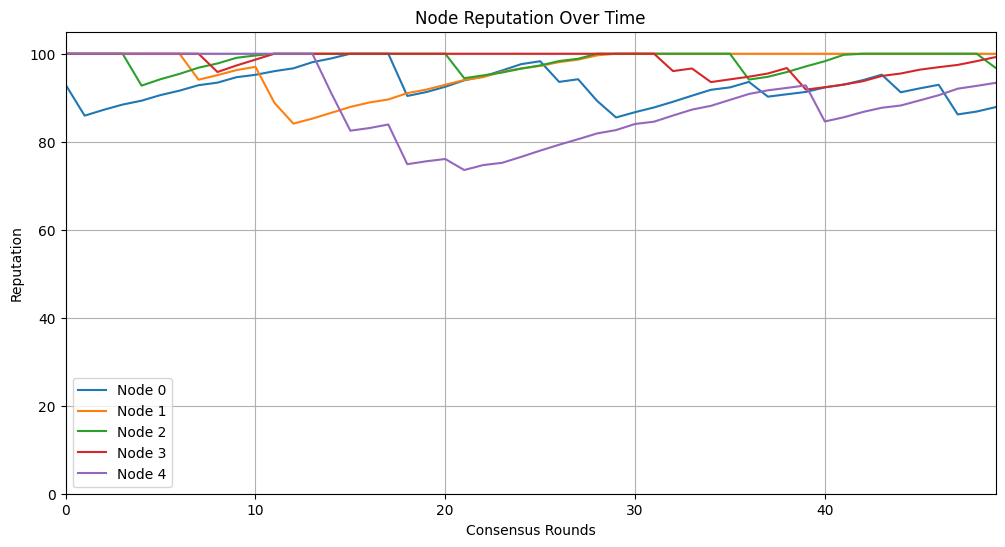


Leader Performance Summary:
Node 0:
 Times as leader: 14
 Average Latency: 0.026999 seconds
 Average Throughput: 598.49 tweets per second
 Average Reputation: 90.23
 Total Malicious Detections: 31
Node 1:
 Times as leader: 9
 Average Latency: 0.026998 seconds
 Average Throughput: 597.92 tweets per second
 Average Reputation: 94.76
 Total Malicious Detections: 18
Node 2:
 Times as leader: 9
 Average Latency: 0.027482 seconds
 Average Throughput: 586.53 tweets per second
 Average Reputation: 94.85
 Total Malicious Detections: 5
Node 3:
 Times as leader: 11
 Average Latency: 0.026874 seconds
 Average Throughput: 599.93 tweets per second
 Average Reputation: 91.98
 Total Malicious Detections: 18
Node 4:
 Times as leader: 7
 Average Latency: 0.029066 seconds
 Average Throughput: 558.76 tweets per second
 Average Reputation: 84.64
 Total Malicious Detections: 1


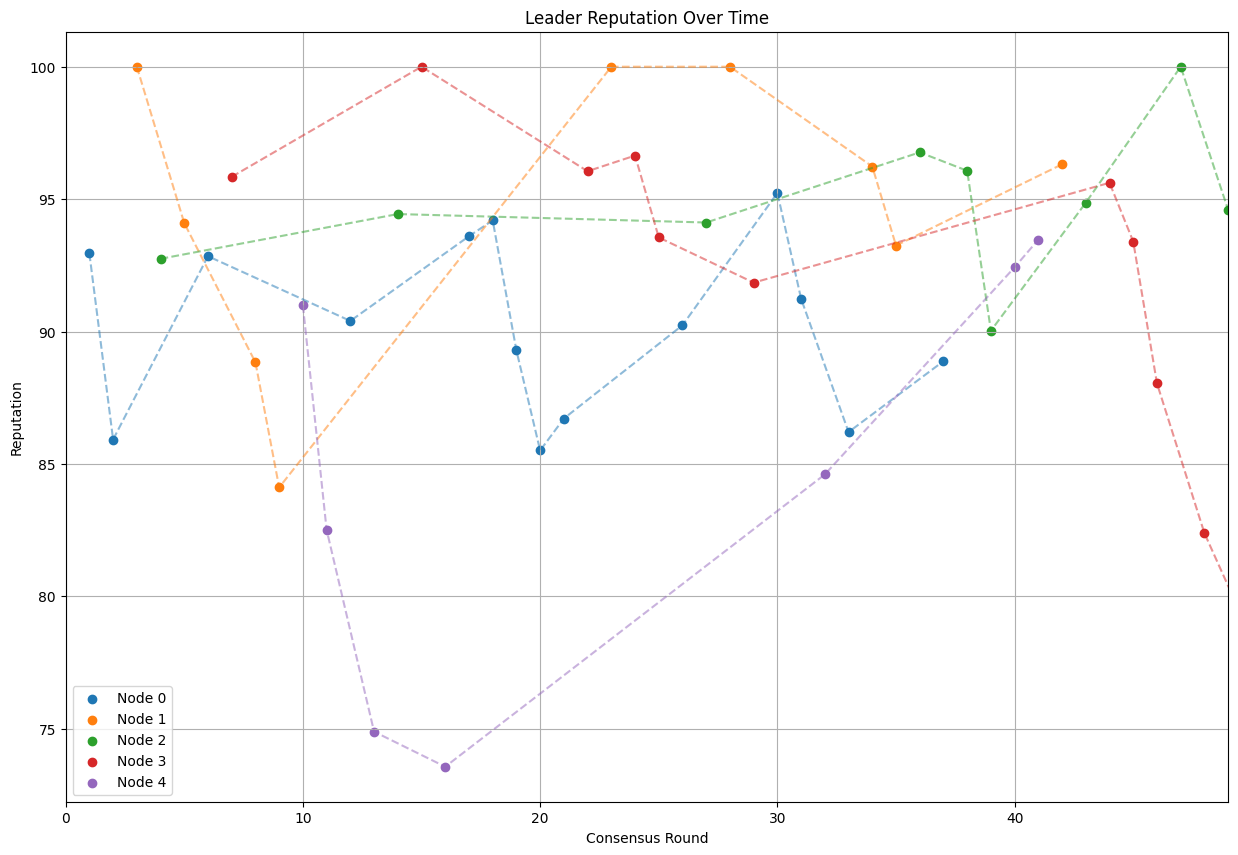

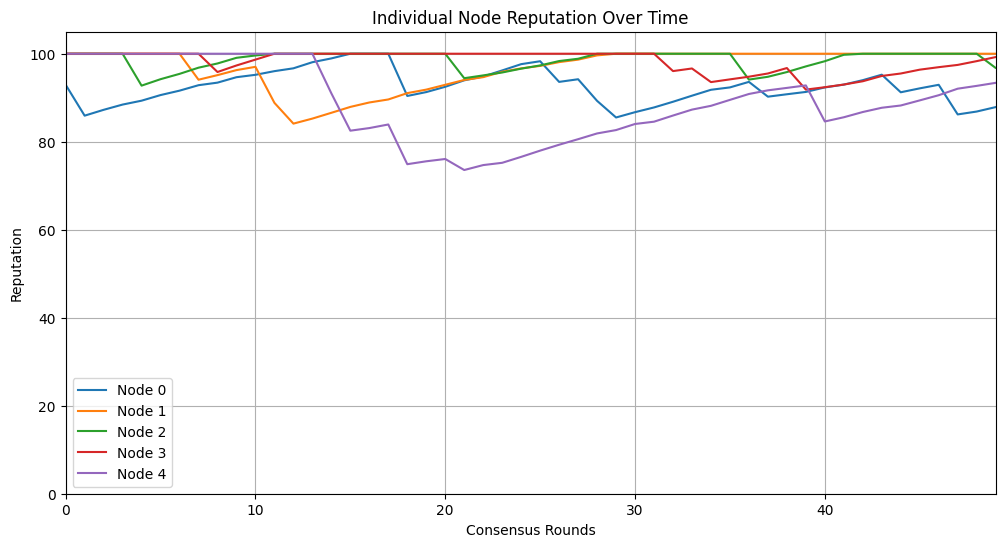

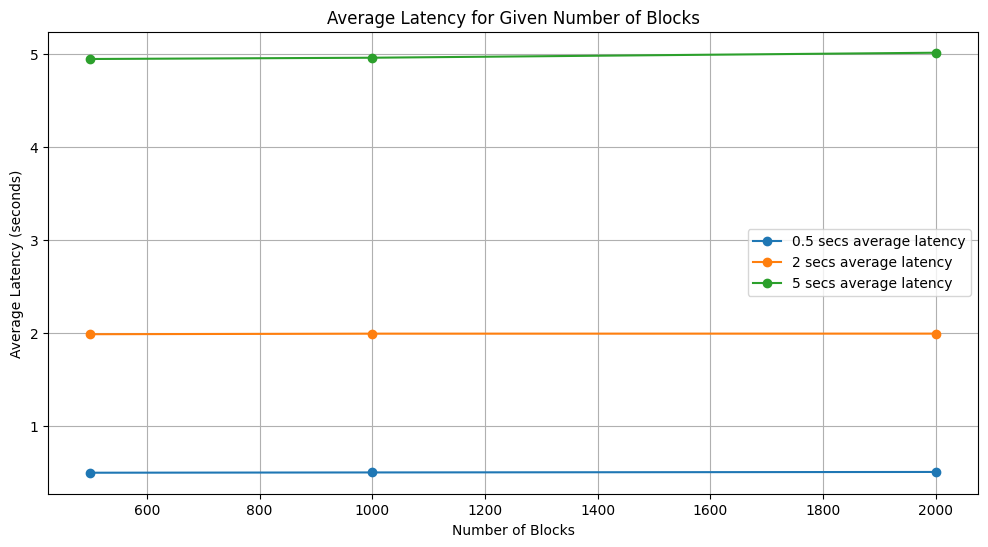

In [18]:
import random
import hashlib
import tenseal as ts
import time
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd

# Node class representing individual participants in the blockchain network
class Node:
    def __init__(self, node_id, context):
        self.node_id = node_id  # Unique identifier for the node
        self.reputation = 100  # Initial reputation score of the node
        self.is_malicious = False  # Flag to track malicious behavior
        self.context = context  # TenSEAL context for encryption
        self.reputation_history = []  # List to track reputation changes over time
        self.malicious_count = 0  # Count of times the node has acted maliciously
        self.validation_times = []  # List to record validation times
        self.block_creation_times = []  # List to record block creation times

    # Propose a block for the blockchain, potentially with malicious behavior
    def propose_block(self, blockchain, tweets, malicious=False):
        start_time = time.time()

        # Filter non-fake tweets and convert text into ordinal values for encryption
        non_fake_tweets = [tweet for tweet in tweets if tweet['is_fake'] == 0]
        tweet_values = [ord(c) for tweet in non_fake_tweets for c in tweet['text']]

        # Encrypt tweet data using CKKS encryption scheme
        encrypted_tweets = ts.ckks_vector(self.context, tweet_values)
        valid_tweet_count = ts.ckks_vector(self.context, [len(non_fake_tweets)])  # Encrypt count of valid tweets
        total_tweets = ts.ckks_vector(self.context, [len(tweets)])  # Encrypt total tweet count

        # If the node is malicious, generate an invalid proof
        if malicious:
            proof = "malicious_proof_" + str(random.randint(1, 10000))
        else:
            proof = self.generate_proof(valid_tweet_count, total_tweets)

        # Append the block to the blockchain
        blockchain.append((encrypted_tweets, valid_tweet_count, total_tweets, proof))

        # Record block creation time
        end_time = time.time()
        block_creation_time = end_time - start_time
        self.block_creation_times.append(block_creation_time)

        return valid_tweet_count, total_tweets, block_creation_time

    # Generate a cryptographic proof for the block using SHA-256
    def generate_proof(self, valid_tweet_count, total_tweets):
        proof_data = str(valid_tweet_count) + str(total_tweets)
        proof = hashlib.sha256(proof_data.encode()).hexdigest()  # Hash proof data
        print(f"Node {self.node_id} generates proof: {proof}")
        return proof

    # Verify the proof generated by another node
    def verify_proof(self, proof, valid_tweet_count, total_tweets):
        start_time = time.time()

        # Recompute the expected proof and compare it with the received proof
        proof_data = str(valid_tweet_count) + str(total_tweets)
        expected_proof = hashlib.sha256(proof_data.encode()).hexdigest()
        is_valid = proof == expected_proof  # Validate the proof

        # Record validation time
        end_time = time.time()
        validation_time = end_time - start_time
        self.validation_times.append(validation_time)

        print(f"Node {self.node_id} verifies proof: {proof} against expected: {expected_proof}")
        print(f"Validation time: {validation_time:.6f} seconds")

        # Update node reputation based on validation speed
        self.update_reputation(validation_time, 0.1)
        return is_valid, validation_time

    # Update the node's reputation based on its performance
    def update_reputation(self, validation_time, threshold):
        if validation_time <= threshold:
            # Reward the node for fast validation
            self.reputation += random.uniform(0.5, 1.5)
        else:
            # Penalize the node for slow validation
            reputation_loss = random.uniform(0.5, 1.5) * (validation_time - threshold)
            self.reputation -= reputation_loss

        # Ensure the reputation stays between 0 and 100
        self.reputation = max(0, min(100, self.reputation))
        self.reputation_history.append(self.reputation)

# Blockchain network class to manage consensus, block creation, and node performance
class BlockchainNetwork:
    def __init__(self, num_nodes):
        # Set up CKKS encryption context using TenSEAL
        self.context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
        self.context.global_scale = 2**40
        self.context.generate_galois_keys()  # Generate Galois keys for encrypted operations

        # Initialize the network with a specified number of nodes
        self.nodes = [Node(i, self.context) for i in range(num_nodes)]
        self.blockchain = []  # List to store the blockchain
        self.total_valid_tweets = ts.ckks_vector(self.context, [0])  # Encrypted count of valid tweets
        self.total_tweets = ts.ckks_vector(self.context, [0])  # Encrypted count of total tweets

        # Thresholds for validation time and block creation time
        self.validation_time_threshold = 0.1
        self.block_creation_time_threshold = 1.0

        # Deques to track latencies and throughputs over consensus rounds
        self.latencies = deque(maxlen=1000)
        self.throughputs = deque(maxlen=1000)

        # Dictionary to track leader performance metrics
        self.leader_performance = {}

    # Consensus mechanism to validate and propose new blocks of tweets
    def consensus(self, tweets):
        eligible_nodes = [node for node in self.nodes if node.reputation >= 50]  # Nodes with reputation >= 50 are eligible

        if len(eligible_nodes) < 1:
            print("Not enough eligible nodes for consensus.")
            return

        # Select a primary node based on reputation weights, with a 20% chance of malicious behavior
        primary_node = random.choices(eligible_nodes, weights=[node.reputation for node in eligible_nodes], k=1)[0]
        malicious = random.random() < 0.2  # 20% chance of malicious behavior

        if malicious:
            print(f"\nPrimary Node {primary_node.node_id} is behaving maliciously in this round.")
        else:
            print(f"\nPrimary Node for this round: Node {primary_node.node_id}")

        # Primary node proposes a block (with possible malicious behavior)
        start_time = time.time()
        valid_tweet_count, total_tweets, block_creation_time = primary_node.propose_block(self.blockchain, tweets, malicious=malicious)

        malicious_detected = False
        # Other nodes verify the proof generated by the primary node
        for node in eligible_nodes:
            if node != primary_node:
                is_valid, validation_time = node.verify_proof(self.blockchain[-1][3], valid_tweet_count, total_tweets)
                if not is_valid:
                    # If proof is invalid, mark the primary node as malicious
                    primary_node.is_malicious = True
                    primary_node.malicious_count += 1
                    malicious_detected = True
                    print(f"Node {node.node_id} detected an invalid proof and reported Node {primary_node.node_id} as malicious.")
                    break
                # Update the node's reputation based on validation time
                node.update_reputation(validation_time, self.validation_time_threshold)

        if malicious_detected:
            # Penalize the primary node for malicious behavior
            reputation_loss = random.uniform(15, 25) * primary_node.malicious_count
            primary_node.update_reputation(-reputation_loss, self.validation_time_threshold)
            print(f"Node {primary_node.node_id} loses {reputation_loss:.2f} reputation points due to malicious activity.")
        else:
            # Update blockchain statistics for valid tweets and total tweets
            self.total_valid_tweets += valid_tweet_count
            self.total_tweets += total_tweets
            print(f"Block added to the blockchain.")

            # Reward the primary node for successful block creation
            primary_node.update_reputation(random.uniform(3, 7), self.validation_time_threshold)

            # Penalize the primary node if block creation took too long
            if block_creation_time > self.block_creation_time_threshold:
                primary_node.update_reputation(-random.uniform(8, 12), self.validation_time_threshold)
                print(f"Node {primary_node.node_id} was slow in block creation and loses reputation points.")

        # Slightly adjust the reputation of nodes that were not part of the consensus round
        for node in self.nodes:
            if node not in eligible_nodes:
                node.update_reputation(random.uniform(-0.5, 0.5), self.validation_time_threshold)

        # Record latency and throughput for the round
        end_time = time.time()
        total_latency = end_time - start_time
        self.latencies.append(total_latency)

        throughput = len(tweets) / total_latency
        self.throughputs.append(throughput)

        # Track leader performance metrics
        if primary_node.node_id not in self.leader_performance:
            self.leader_performance[primary_node.node_id] = []
        self.leader_performance[primary_node.node_id].append({
            'round': len(self.blockchain),
            'latency': total_latency,
            'throughput': throughput,
            'reputation': primary_node.reputation,
            'malicious_count': primary_node.malicious_count
        })

    # Print a summary of the performance of all nodes
    def print_performance_summary(self):
        print("\nPerformance Summary of Nodes:")
        for node in self.nodes:
            status = "Malicious" if node.is_malicious else "Honest"
            avg_validation_time = sum(node.validation_times) / len(node.validation_times) if node.validation_times else 0
            avg_block_creation_time = sum(node.block_creation_times) / len(node.block_creation_times) if node.block_creation_times else 0
            print(f"Node {node.node_id}: Reputation = {node.reputation:.2f}, Status = {status}, "
                  f"Malicious Count = {node.malicious_count}, Avg Validation Time = {avg_validation_time:.6f}s, "
                  f"Avg Block Creation Time = {avg_block_creation_time:.6f}s")

    # Print statistics about the tweets processed
    def print_tweet_statistics(self):
        total_tweets = self.total_tweets.decrypt()[0]  # Decrypt the total tweet count
        non_fake_tweets = self.total_valid_tweets.decrypt()[0]  # Decrypt the valid tweet count
        percentage_non_fake = (non_fake_tweets / total_tweets) * 100 if total_tweets > 0 else 0
        print(f"\nTweet Statistics:")
        print(f"Total Tweets Processed: {total_tweets:.0f}")
        print(f"Non-Fake Tweets: {non_fake_tweets:.0f}")
        print(f"Percentage of Non-Fake Tweets: {percentage_non_fake:.2f}%")

    # Print latency and throughput statistics over consensus rounds
    def print_latency_throughput_stats(self):
        avg_latency = sum(self.latencies) / len(self.latencies) if self.latencies else 0
        avg_throughput = sum(self.throughputs) / len(self.throughputs) if self.throughputs else 0
        print(f"\nLatency and Throughput Statistics:")
        print(f"Average Latency: {avg_latency:.6f} seconds")
        print(f"Average Throughput: {avg_throughput:.2f} tweets per second")

    # Plot the reputation of nodes over time
    def plot_node_performance(self):
        plt.figure(figsize=(12, 6))
        for node in self.nodes:
            plt.plot(range(len(node.reputation_history)), node.reputation_history, label=f'Node {node.node_id}')
        plt.title('Node Reputation Over Time')
        plt.xlabel('Consensus Rounds')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 105)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to the number of consensus rounds
        plt.show()

    # Print performance summary for nodes that acted as leaders
    def print_leader_performance(self):
        print("\nLeader Performance Summary:")
        for node_id, performances in self.leader_performance.items():
            avg_latency = sum(p['latency'] for p in performances) / len(performances)
            avg_throughput = sum(p['throughput'] for p in performances) / len(performances)
            avg_reputation = sum(p['reputation'] for p in performances) / len(performances)
            total_malicious = sum(p['malicious_count'] for p in performances)
            print(f"Node {node_id}:")
            print(f" Times as leader: {len(performances)}")
            print(f" Average Latency: {avg_latency:.6f} seconds")
            print(f" Average Throughput: {avg_throughput:.2f} tweets per second")
            print(f" Average Reputation: {avg_reputation:.2f}")
            print(f" Total Malicious Detections: {total_malicious}")

    # Plot reputation of leader nodes over time
    def plot_leader_performance(self):
        plt.figure(figsize=(15, 10))
        for node_id, performances in self.leader_performance.items():
            rounds = [p['round'] for p in performances]
            reputations = [p['reputation'] for p in performances]
            plt.scatter(rounds, reputations, label=f'Node {node_id}')
            plt.plot(rounds, reputations, linestyle='--', alpha=0.5)
        plt.title('Leader Reputation Over Time')
        plt.xlabel('Consensus Round')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to the number of consensus rounds
        plt.show()

    # Plot individual node performance over time
    def plot_individual_node_performance(self):
        plt.figure(figsize=(12, 6))
        for node in self.nodes:
            plt.plot(range(len(node.reputation_history)), node.reputation_history, label=f'Node {node.node_id}')
        plt.title('Individual Node Reputation Over Time')
        plt.xlabel('Consensus Rounds')
        plt.ylabel('Reputation')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 105)
        plt.xlim(0, len(self.blockchain) - 1)  # Set x-axis limit to the number of consensus rounds
        plt.show()

    # Simulate latency for multiple consensus rounds and latencies
    def run_latency_simulation(self, n_list, average_latency_list):
        results = {latency: [] for latency in average_latency_list}
        for latency in average_latency_list:
            for n in n_list:
                total_latency = 0
                for _ in range(n):
                    validation_time = random.normalvariate(latency, latency * 0.2)
                    total_latency += validation_time
                avg_latency_result = total_latency / n
                results[latency].append(avg_latency_result)
        return results

    # Plot latency simulation results for different block sizes and latencies
    def plot_latency_results(self, results, n_list, average_latency_list):
        plt.figure(figsize=(12, 6))
        for latency in average_latency_list:
            latencies = results[latency]
            plt.plot(n_list, latencies, marker='o', label=f'{latency} secs average latency')
        plt.xlabel("Number of Blocks")
        plt.ylabel("Average Latency (seconds)")
        plt.title("Average Latency for Given Number of Blocks")
        plt.legend()
        plt.grid(True)
        plt.show()

# Load dataset and prepare tweets
df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv', sep=',', encoding='utf-8', on_bad_lines='error')
df = df.drop(32939)  # Drop problematic row if necessary
df['is_fake'] = [random.choice([0, 1]) for _ in range(len(df))]  # Assign random fake/not fake labels
df['not_fake'] = [1 - x for x in df['is_fake']]  # Invert the 'is_fake' label for comparison
selected_tweets = df.sample(30)  # Select a random sample of 30 tweets
tweets = [{'text': row['text'], 'is_fake': row['is_fake']} for index, row in selected_tweets.iterrows() if row['is_fake'] == 0]

# Initialize blockchain network with 5 nodes
blockchain_network = BlockchainNetwork(5)

# Run the consensus simulation for 50 rounds
num_rounds = 50
for round_number in range(num_rounds):
    print(f"\n--- Consensus Round {round_number + 1} ---")
    blockchain_network.consensus(tweets)

# Print performance summaries and statistics
blockchain_network.print_performance_summary()
blockchain_network.print_tweet_statistics()
blockchain_network.print_latency_throughput_stats()
blockchain_network.plot_node_performance()
blockchain_network.print_leader_performance()
blockchain_network.plot_leader_performance()
blockchain_network.plot_individual_node_performance()

# Run latency simulation with realistic values
n_list = [500, 1000, 2000]
average_latency_list = [0.5, 2, 5]
results = blockchain_network.run_latency_simulation(n_list, average_latency_list)

# Plot latency results
blockchain_network.plot_latency_results(results, n_list, average_latency_list)

ENCRYPTING AND DECRYPTING

In [23]:
import pandas as pd
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization, hashes
import base64

# Function to generate a pair of RSA keys: a private key and a corresponding public key
def generate_key_pair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,  # Standard public exponent, widely used for its efficiency and security
        key_size=2048  # Key size of 2048 bits, which is considered secure for most use cases
    )
    public_key = private_key.public_key()  # Generate the public key from the private key
    return private_key, public_key

# Function to encrypt a message using RSA and OAEP padding with a public key
def encrypt_message(message, public_key):
    try:
        # RSA has a limitation on message size based on the key size and padding; message is truncated to 190 characters
        message = message[:190]

        # Ensure only ASCII characters are used for compatibility with RSA encryption
        message = ''.join(char for char in message if ord(char) < 128)

        # Encrypt the message using the public key with OAEP padding (using SHA-256 for hashing and MGF)
        encrypted = public_key.encrypt(
            message.encode('ascii', errors='ignore'),  # Encode the message into bytes
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),  # MGF1 mask generation function with SHA-256
                algorithm=hashes.SHA256(),  # SHA-256 used as the hashing algorithm
                label=None  # No label is included for this encryption
            )
        )

        # Return the encrypted message encoded in base64 for safe transmission or storage as a string
        return base64.b64encode(encrypted).decode()

    except Exception:
        return None  # If encryption fails for any reason, return None

# Function to decrypt an encrypted message using RSA and a private key
def decrypt_message(encrypted_message, private_key):
    try:
        # Decode the base64-encoded encrypted message back into bytes
        decrypted = private_key.decrypt(
            base64.b64decode(encrypted_message),  # Decode from base64 to raw encrypted bytes
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),  # MGF1 with SHA-256 as the mask generation function
                algorithm=hashes.SHA256(),  # SHA-256 used as the hashing algorithm during decryption
                label=None  # No label used, must match the encryption process
            )
        )

        # Convert the decrypted bytes back to an ASCII string and return
        return decrypted.decode('ascii')

    except Exception:
        return None  # If decryption fails for any reason, return None

In [25]:
# Load the dataset
df = pd.read_csv('/content/0819_UkraineCombinedTweetsDeduped (1).csv')

# Generate key pair
private_key, public_key = generate_key_pair()

# Encrypt tweets and save to file
encrypted_tweets = []
for _, row in df.iterrows():
    if pd.notna(row['text']) and row['text'].strip():
        encrypted_tweet = encrypt_message(row['text'], public_key)
        if encrypted_tweet:
            encrypted_tweets.append(encrypted_tweet)

# Save encrypted tweets to file
with open('encrypted_tweets.txt', 'w') as f:
    for tweet in encrypted_tweets:
        f.write(f"{tweet}\n")

# Save public key to file
pem = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)
with open('public_key.pem', 'wb') as f:
    f.write(pem)

# Save private key to file
pem = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.PKCS8,
    encryption_algorithm=serialization.NoEncryption()
)
with open('private_key.pem', 'wb') as f:
    f.write(pem)

print("Encryption complete. Encrypted tweets and keys have been saved to files.")


Encryption complete. Encrypted tweets and keys have been saved to files.


In [26]:
# Demonstrate decryption
print("\nDecryption demonstration:")
# Decrypt the first 5 tweets
for i, encrypted_tweet in enumerate(encrypted_tweets[:5]):
    decrypted_tweet = decrypt_message(encrypted_tweet, private_key)
    if decrypted_tweet:
        print(f"Tweet {i+1}: {decrypted_tweet}")
    else:
        print(f"Tweet {i+1}: Decryption failed")


Decryption demonstration:
Tweet 1: Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#
Tweet 2: #Mundo 

Al menos 6 muertos y 16 heridos en bombardeo ruso en #Kharkiv

https://t.co/AZzEgw2NLe
Tweet 3: Animal shelter Dogs and Cats, we need your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/Z3re0ItTfy
https://t.co/I9dbwRrtg0
https://t.co/71pErM8xBZ

#
Tweet 4: Welcome to our shelter!
Located in Ukraine, Kyiv
Our shelter needs your help!
Raising funds food for animals.
PayPal: dogandcat.helper@gmail.com
https://t.co/RH0peqvaXT
https://t.co/rTtTVpoC
Tweet 5: Tensin, debido a que #Rusia sigue en pie en la Planta Nuclear #Zaporiyia, traera un caos como #Chernbil? 
https://t.co/gxgEg40RiB
